#  ML model that will predict likelihood of getting H1B approved 
  
### Goal of the Project

The goal of my project is to answer the following question: Is it possible to predict if an H1B application will be Certified or not given the selected company sponsor/job title/duration?
 

### Variables

The project will focus on Company sponsor (Employers), Job Title, process Duration, salaries to start of. Note that to calculate the Duration, Decision Date and Case submitted date are used.

### Sample Date

From the original data (650K observations), a random sample of 7K observations was drawn for the purpose of performing the analysis

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pylab
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
data_eda = pd.read_excel("/Users/sheikita/Desktop/data/H-1B_EDAco.xlsx")

In [4]:
data_eda.head(20)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-18026-338377,CERTIFIED,2018-01-29,2018-02-02,H-1B,2018-07-28,2021-07-27,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,...,N,N,NaN,NaN,NaN,REDMOND,KING,WA,98052,NaT
1,I-200-17296-353451,CERTIFIED,2017-10-23,2017-10-27,H-1B,2017-11-06,2020-11-06,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,...,N,N,NaN,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110,NaT
2,I-200-18242-524477,CERTIFIED,2018-08-30,2018-09-06,H-1B,2018-09-10,2021-09-09,LOGIXHUB LLC,NaN,320 DECKER DRIVE,...,N,N,NaN,NaN,NaN,IRVING,DALLAS,TX,75062,NaT
3,I-200-18243-850522,CERTIFIED,2018-08-31,2018-09-07,H-1B,2018-09-07,2021-09-06,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,...,Y,N,Y,Y,NaN,BIRMINGHAM,SHELBY,AL,35244,NaT
4,I-200-18142-939501,CERTIFIED,2018-05-22,2018-05-29,H-1B,2018-05-29,2021-05-28,OBERON IT,NaN,1404 W WALNUT HILL LN,...,Y,N,Y,NaN,NaN,SUNRISE,BROWARD,FL,33323,NaT
5,I-200-18121-552858,CERTIFIED,2018-05-01,2018-05-07,H-1B,2018-05-02,2018-10-26,ICONSOFT INC.,NaN,101 CAMBRIDGE STREET SUITE 360,...,Y,N,Y,NaN,NaN,JACKSONVILLE,DUVAL COUNTY,FL,32202,NaT
6,I-200-18215-849606,CERTIFIED,2018-08-03,2018-08-09,H-1B,2018-08-11,2021-08-11,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,NaN,211 QUALITY CIRCLE,...,Y,N,Y,NaN,NaN,OWINGS MILLS,BALTIMORE,MD,21117,NaT
7,I-201-17339-472823,CERTIFIED,2017-12-08,2017-12-14,H-1B1 Chile,2017-12-08,2019-06-07,ISHI SYSTEMS INC,NaN,185 HUDSON STREET,...,NaN,NaN,NaN,NaN,NaN,JERSEY CITY,HUDSON,NJ,07311,NaT
8,I-200-18233-239931,CERTIFIED,2018-08-21,2018-08-27,H-1B,2018-09-05,2021-09-04,"WB SOLUTIONS, LLC",NaN,7320 E FLETCHER AVE,...,Y,N,Y,Y,NaN,ALPHARETTA,FULTON,GA,30005,NaT
9,I-200-18059-006093,CERTIFIED,2018-02-28,2018-03-06,H-1B,2018-05-15,2021-05-15,INFOSTRETCH CORPORATION,NaN,"3200 PATRICK HENRY DRIVE, SUITE 250",...,Y,N,Y,Y,NaN,PLEASANTON,ALAMEDA,CA,94588,NaT


In [5]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 52 columns):
CASE_NUMBER                    7001 non-null object
CASE_STATUS                    7001 non-null object
CASE_SUBMITTED                 7001 non-null datetime64[ns]
DECISION_DATE                  7001 non-null datetime64[ns]
VISA_CLASS                     7001 non-null object
EMPLOYMENT_START_DATE          7000 non-null datetime64[ns]
EMPLOYMENT_END_DATE            7000 non-null datetime64[ns]
EMPLOYER_NAME                  7001 non-null object
EMPLOYER_BUSINESS_DBA          791 non-null object
EMPLOYER_ADDRESS               7001 non-null object
EMPLOYER_CITY                  7001 non-null object
EMPLOYER_STATE                 7001 non-null object
EMPLOYER_POSTAL_CODE           7001 non-null object
EMPLOYER_COUNTRY               7001 non-null object
EMPLOYER_PROVINCE              39 non-null object
EMPLOYER_PHONE                 7001 non-null int64
EMPLOYER_PHONE_EXT             35

In [6]:
data_eda['DURATION'] = data_eda['DECISION_DATE'] - data_eda['CASE_SUBMITTED']

In [7]:
data_eda.head(20)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE,DURATION
0,I-200-18026-338377,CERTIFIED,2018-01-29,2018-02-02,H-1B,2018-07-28,2021-07-27,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,...,N,NaN,NaN,NaN,REDMOND,KING,WA,98052,NaT,4 days
1,I-200-17296-353451,CERTIFIED,2017-10-23,2017-10-27,H-1B,2017-11-06,2020-11-06,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,...,N,NaN,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110,NaT,4 days
2,I-200-18242-524477,CERTIFIED,2018-08-30,2018-09-06,H-1B,2018-09-10,2021-09-09,LOGIXHUB LLC,NaN,320 DECKER DRIVE,...,N,NaN,NaN,NaN,IRVING,DALLAS,TX,75062,NaT,7 days
3,I-200-18243-850522,CERTIFIED,2018-08-31,2018-09-07,H-1B,2018-09-07,2021-09-06,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,...,N,Y,Y,NaN,BIRMINGHAM,SHELBY,AL,35244,NaT,7 days
4,I-200-18142-939501,CERTIFIED,2018-05-22,2018-05-29,H-1B,2018-05-29,2021-05-28,OBERON IT,NaN,1404 W WALNUT HILL LN,...,N,Y,NaN,NaN,SUNRISE,BROWARD,FL,33323,NaT,7 days
5,I-200-18121-552858,CERTIFIED,2018-05-01,2018-05-07,H-1B,2018-05-02,2018-10-26,ICONSOFT INC.,NaN,101 CAMBRIDGE STREET SUITE 360,...,N,Y,NaN,NaN,JACKSONVILLE,DUVAL COUNTY,FL,32202,NaT,6 days
6,I-200-18215-849606,CERTIFIED,2018-08-03,2018-08-09,H-1B,2018-08-11,2021-08-11,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,NaN,211 QUALITY CIRCLE,...,N,Y,NaN,NaN,OWINGS MILLS,BALTIMORE,MD,21117,NaT,6 days
7,I-201-17339-472823,CERTIFIED,2017-12-08,2017-12-14,H-1B1 Chile,2017-12-08,2019-06-07,ISHI SYSTEMS INC,NaN,185 HUDSON STREET,...,NaN,NaN,NaN,NaN,JERSEY CITY,HUDSON,NJ,07311,NaT,6 days
8,I-200-18233-239931,CERTIFIED,2018-08-21,2018-08-27,H-1B,2018-09-05,2021-09-04,"WB SOLUTIONS, LLC",NaN,7320 E FLETCHER AVE,...,N,Y,Y,NaN,ALPHARETTA,FULTON,GA,30005,NaT,6 days
9,I-200-18059-006093,CERTIFIED,2018-02-28,2018-03-06,H-1B,2018-05-15,2021-05-15,INFOSTRETCH CORPORATION,NaN,"3200 PATRICK HENRY DRIVE, SUITE 250",...,N,Y,Y,NaN,PLEASANTON,ALAMEDA,CA,94588,NaT,6 days


In [9]:
eda_h = data_eda[['DURATION','CASE_STATUS','EMPLOYER_NAME', 'JOB_TITLE', 'TOTAL_WORKERS', 'SOC_CODE']]
eda_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 6 columns):
DURATION         7001 non-null timedelta64[ns]
CASE_STATUS      7001 non-null object
EMPLOYER_NAME    7001 non-null object
JOB_TITLE        7001 non-null object
TOTAL_WORKERS    7001 non-null int64
SOC_CODE         6999 non-null object
dtypes: int64(1), object(4), timedelta64[ns](1)
memory usage: 328.2+ KB


In [10]:
eda_h.SOC_CODE.value_counts(dropna=False)

15-1132       2202
15-1121        487
15-1199        377
29-1069        367
15-1133        328
11-3021        197
17-2072        174
13-2011        151
13-2051        141
17-2071        102
11-2021        102
15-1131         99
13-1111         91
17-2141         86
29-1063         75
11-3031         69
19-1021         67
23-1011         65
15-1142         64
15-2031         63
17-2051         53
17-1011         49
13-1161         48
15-1141         46
15-1122         43
11-1021         41
15-1111         38
11-9041         36
19-1042         36
15-2041         35
              ... 
19-3039          1
53-3021          1
29-2041          1
43-6012          1
19-4011          1
17-3022          1
29-1181          1
19-1029.02       1
15-1052          1
11-9031          1
13-2052          1
35-2014          1
25-1051          1
29-1022          1
13-1023          1
41-3011          1
19-4093          1
25-9021          1
13-1131          1
21-1091          1
25-2053          1
29-1031     

In [11]:
eda_h.describe()

,DURATION,TOTAL_WORKERS
count,7001,7001.000000
mean,42 days 15:31:32.815312,2.632767
std,157 days 01:49:58.645732,7.982327
min,0 days 00:00:00,0.000000
25%,5 days 00:00:00,1.000000
50%,6 days 00:00:00,1.000000
75%,6 days 00:00:00,1.000000
max,1963 days 00:00:00,150.000000


In [13]:
eda_h = eda_h.fillna({"SOC_CODE": 0})
eda_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 6 columns):
DURATION         7001 non-null timedelta64[ns]
CASE_STATUS      7001 non-null object
EMPLOYER_NAME    7001 non-null object
JOB_TITLE        7001 non-null object
TOTAL_WORKERS    7001 non-null int64
SOC_CODE         7001 non-null object
dtypes: int64(1), object(4), timedelta64[ns](1)
memory usage: 328.2+ KB


In [15]:
eda_h['CASE_STATUS'] = eda_h['CASE_STATUS'].astype('category')
eda_h['EMPLOYER_NAME'] = eda_h['EMPLOYER_NAME'].astype('category')
eda_h['JOB_TITLE'] = eda_h['JOB_TITLE'].astype('category')
eda_h['TOTAL_WORKERS'] = eda_h['TOTAL_WORKERS'].astype('category')
eda_h['SOC_CODE'] = eda_h['SOC_CODE'].astype('category')

In [20]:
eda_h['DURATION'] = eda_h['DURATION']/ np.timedelta64(1, 'h')

TypeError: ufunc true_divide cannot use operands with types dtype('float64') and dtype('<m8[h]')

In [27]:
eda_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 6 columns):
DURATION         7001 non-null float64
CASE_STATUS      7001 non-null category
EMPLOYER_NAME    7001 non-null category
JOB_TITLE        7001 non-null category
TOTAL_WORKERS    7001 non-null category
SOC_CODE         7001 non-null category
dtypes: category(5), float64(1)
memory usage: 411.5 KB


In [21]:
eda_h.describe()

,DURATION
count,7001.000000
mean,1023.525782
std,3769.832957
min,0.000000
25%,120.000000
50%,144.000000
75%,144.000000
max,47112.000000


In [22]:
eda_h.DURATION

0        96.0
1        96.0
2       168.0
3       168.0
4       168.0
5       144.0
6       144.0
7       144.0
8       144.0
9       144.0
10      144.0
11      144.0
12       96.0
13      144.0
14      144.0
15      144.0
16       96.0
17       96.0
18       48.0
19       96.0
20      144.0
21      120.0
22      144.0
23      144.0
24       96.0
25       24.0
26      120.0
27      144.0
28      144.0
29      120.0
        ...  
6971    144.0
6972    168.0
6973    168.0
6974    144.0
6975    144.0
6976    144.0
6977    144.0
6978    144.0
6979    168.0
6980    144.0
6981    144.0
6982     96.0
6983    144.0
6984    168.0
6985    168.0
6986    144.0
6987     96.0
6988    144.0
6989    144.0
6990    168.0
6991     48.0
6992     96.0
6993     96.0
6994     96.0
6995     96.0
6996     48.0
6997    168.0
6998    168.0
6999    144.0
7000    168.0
Name: DURATION, Length: 7001, dtype: float64

In [23]:
# ECDF Function

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

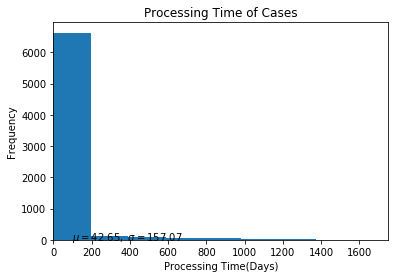

In [26]:
# Plot a histogram 
duration = (eda_h.DURATION)/24  # To convert the hours to days

# plot hist
_ = plt.hist(duration, bins=10)

# labels
_ = plt.text(95.5, 0.5, r'$\mu= {},\ \sigma={}$'.format(round(np.mean(duration), 2), round(np.std(duration), 2)))
_ = plt.xlabel('Processing Time(Days)')
_ = plt.ylabel('Frequency')
_ = plt.title('Processing Time of Cases')

margins = 0.02
plt.xlim(0, 1750)
plt.show();

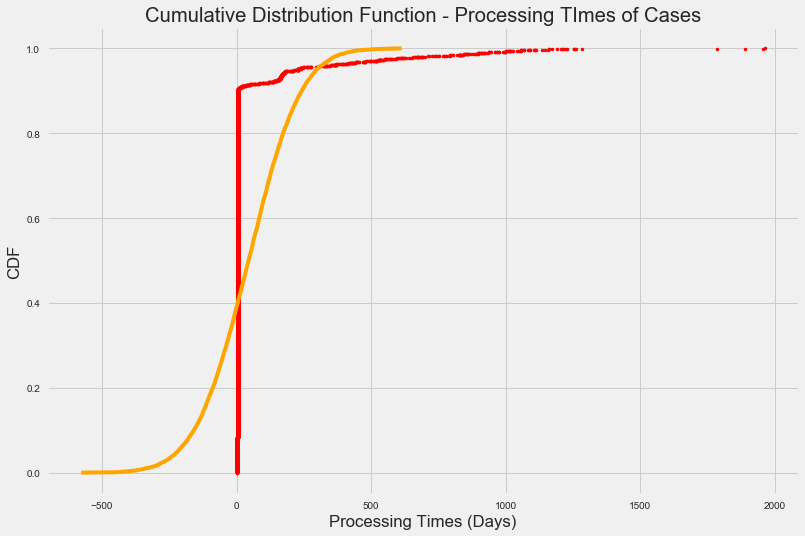

In [28]:
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

# Plot the CDFs
x, y = ecdf(duration)

# draw 10k random samples from a normal distribution
nm_duration = np.random.normal(np.mean(duration), np.std(duration), 10000)
nm_x, nm_y = ecdf(nm_duration)

_ = plt.plot(x, y, marker='.', linestyle='none', color = 'red')
_ = plt.plot(nm_x, nm_y, color = 'orange')

_ = plt.xlabel('Processing Times (Days)')
_ = plt.ylabel('CDF')
_ = plt.title('Cumulative Distribution Function - Processing TImes of Cases')
margins = 0.02

plt.show();

From my analysis, I can state that the processing time data tends to a Normal Distribution.
Using the Central Limit Theorem as my reference, sample was RSS, represents less than 10% of the my population data
and sample is more than 30. 

### Is it possible that the processing time can be less than Average of 42.65 days?
#### Ho: μ <= 42.65 days and Ha: μ >= 42.5 days

In [29]:
## Use Z-statistics with 1 tail at Z value of 1.96
pro_mean = np.mean(duration)
pro_s1 = np.std(duration)/np.sqrt(7001)

z_pro =(42.65 - 40)/pro_s1   #From rprocessing times ranges available from  USCIS site, selected 40 days  
print('Z score:{:.05}'.format(z_pro))


Z score:1.4116


#### Analysis
The result from the Z test indicates that I do not rejet the Null Hypothesis with a confidence of 95%. It opens the door to potential improvements on the processing time.

In [30]:
eda_h["C_cat"] = eda_h["CASE_STATUS"].cat.codes
eda_h["S_cat"] = eda_h["SOC_CODE"].cat.codes
eda_h.head()

,DURATION,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,TOTAL_WORKERS,SOC_CODE,C_cat,S_cat
0,96.0,CERTIFIED,MICROSOFT CORPORATION,SOFTWARE ENGINEER,1,15-1132,0,55
1,96.0,CERTIFIED,ERNST & YOUNG U.S. LLP,TAX SENIOR,1,13-2011,0,39
2,168.0,CERTIFIED,LOGIXHUB LLC,DATABASE ADMINISTRATOR,1,15-1141,0,58
3,168.0,CERTIFIED,"ECLOUD LABS,INC.",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,1,15-1132,0,55
4,168.0,CERTIFIED,OBERON IT,SENIOR SYSTEM ARCHITECT,1,15-1132,0,55


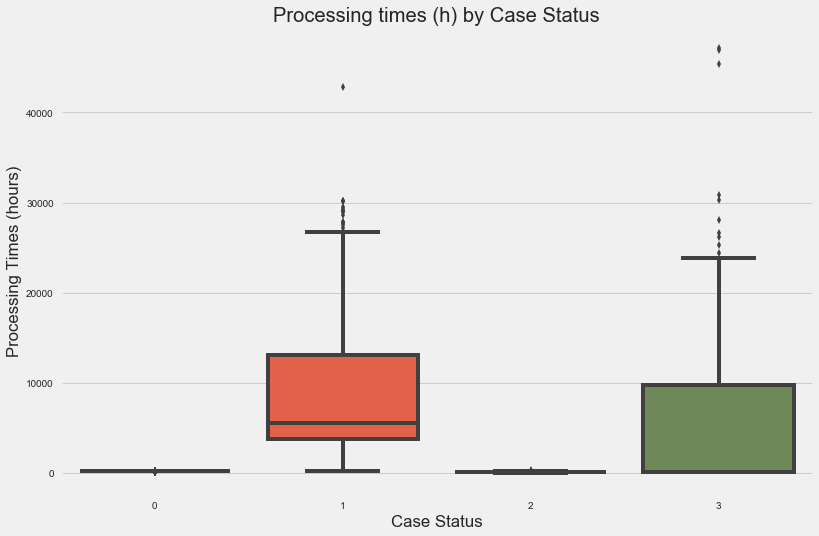

In [33]:
sns.boxplot(x = 'C_cat', y = 'DURATION', data=eda_h)

sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

_ = plt.xlabel('Case Status')
_ = plt.ylabel('Processing Times (hours)')
_ = plt.title('Processing times (h) by Case Status')
plt.show()

In [34]:
eda_h["Job_cat"] = eda_h["JOB_TITLE"].cat.codes


In [35]:
eda_h.sort_values('Job_cat', ascending = False)

,DURATION,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,TOTAL_WORKERS,SOC_CODE,C_cat,S_cat,Job_cat
6336,168.0,CERTIFIED,"LAW OFFICES OF MICHAEL I BROOKS, APC",WRITER,1,27-3043,0,192,3514
5901,144.0,CERTIFIED,SOUTHERN ILLINOIS MEDICAL SERVICES,WOUND CARE PHYSICIAN,1,29-1069,0,211,3513
5314,144.0,CERTIFIED,AKRIS INC.,"WHOLESALE DIRECTOR, PUNTO",1,11-2022,0,5,3512
3593,144.0,CERTIFIED,ACCENTURE LLP,WEST TECHNOLOGY PROGRAM LEAD SENIOR MANAGER,1,11-3021,0,8,3511
1422,144.0,CERTIFIED,"NCS PEARSON, INC.",WEBLOGIC APPLICATIONS SYSTEM ADMINISTRATOR,1,15-1142,0,59,3510
2136,144.0,CERTIFIED,EQUIFAX INC.,WEB USER INTERFACE DEVELOPER - CAREER,1,15-1133,0,56,3509
3162,3240.0,CERTIFIED-WITHDRAWN,"TIBCO SOFTWARE, INC.",WEB UI ARCHITECT,1,15-1132,1,55,3508
2468,72.0,DENIED,STREET CORPORATION,WEB SEVELOPER,1,15-1134,2,57,3507
6967,168.0,CERTIFIED,"BEST BUY CO., INC.",WEB OPERATIONS ANALYST,1,15-1132,0,55,3506
335,144.0,CERTIFIED,ARROW ELECTRONICS INC.,WEB ENGINEER II,1,15-1132,0,55,3505


In [40]:
# Counting how many times the SOC code was in the sample
 codes= eda_h["S_cat"].value_counts()
topcodes = codes.head(10)
print(topcodes)

55     2202
52      487
62      377
211     367
56      328
8       197
78      174
39      151
42      141
4       102
Name: S_cat, dtype: int64


In [48]:
eda_h['CASE_STATUS'].value_counts()

CERTIFIED              5330
DENIED                  908
CERTIFIED-WITHDRAWN     637
WITHDRAWN               126
Name: CASE_STATUS, dtype: int64

Text(0.5,0.98,'Top Job Titles Histogram')

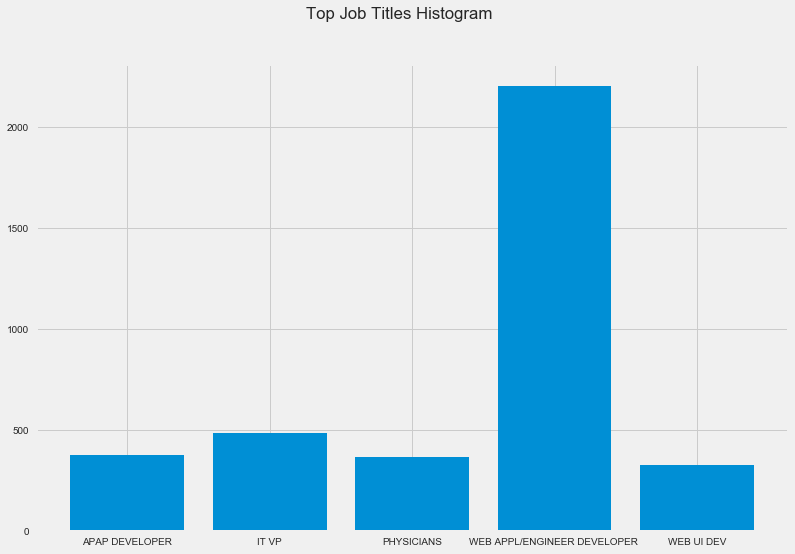

In [121]:
#Histogram of the Top 5 Job Titles
top_codes = {'WEB APPL/ENGINEER DEVELOPER ': 2202, 'IT VP': 487, 'APAP DEVELOPER':377,  'PHYSICIANS': 367, 
        'WEB UI DEV': 328}
nam_e = list(top_codes.keys())
val_e = list(top_codes.values())

fig, ax = plt.subplots()
ax.bar(nam_e, val_e)
fig.suptitle('Top Job Titles Histogram')

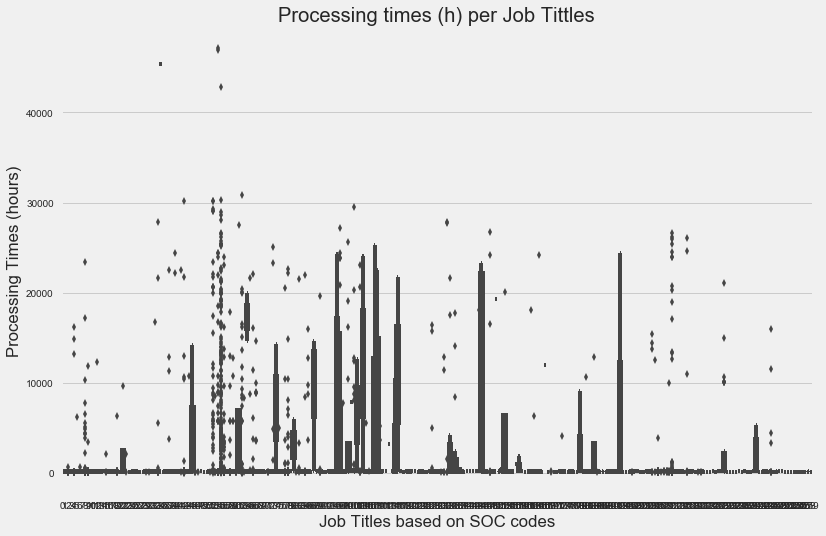

In [61]:
# Plot the Processing times for all Job C
sns.boxplot(x = 'S_cat', y = 'DURATION', data= eda_h)

sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

_ = plt.xlabel('Job Titles based on SOC codes')
_ = plt.ylabel('Processing Times (hours)')
_ = plt.title('Processing times (h) per Job Tittles')
plt.show()

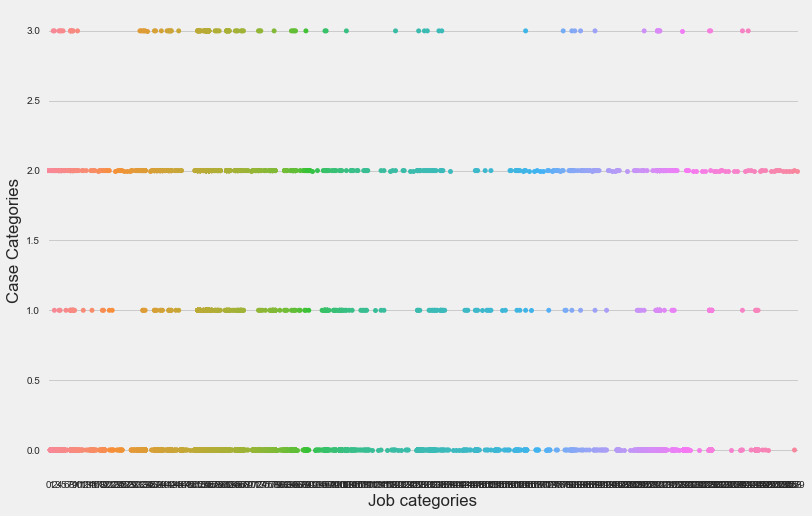

In [46]:
#Plot Job tittles using SOC codes to find out the Status 
_ = sns.swarmplot(x = 'S_cat', y ='C_cat', data = eda_h)
_ = plt.xlabel('Job categories')
_ = plt.ylabel('Case Categories')

margins = 0.02
plt.show()

In [85]:
corr_df = pd.read_excel("/Users/sheikita/Desktop/data/Correlation.xlsx")
corr_df.head(20)

,SOC CODE,CASE_NUMBER,SUM DURATION (Hours)
0,55,2202,101740
1,52,487,21617
2,211,367,14391
3,54,99,12927
4,96,67,11482
5,62,377,11198
6,56,328,7570
7,78,174,5236
8,8,197,5013
9,101,36,4453


In [103]:
corr_df = corr_df.rename(columns = {'CASE_NUMBER':'SOC_counts'})

In [108]:
corr_df = corr_df.rename(columns = {'SUM DURATION (Hours)':'Duration SUM'})

In [116]:
corr_df.reset_index()

,index,SOC CODE,SOC_counts,Duration SUM
0,0,55,2202,101740
1,1,52,487,21617
2,2,211,367,14391
3,3,54,99,12927
4,4,96,67,11482
5,5,62,377,11198
6,6,56,328,7570
7,7,78,174,5236
8,8,8,197,5013
9,9,101,36,4453


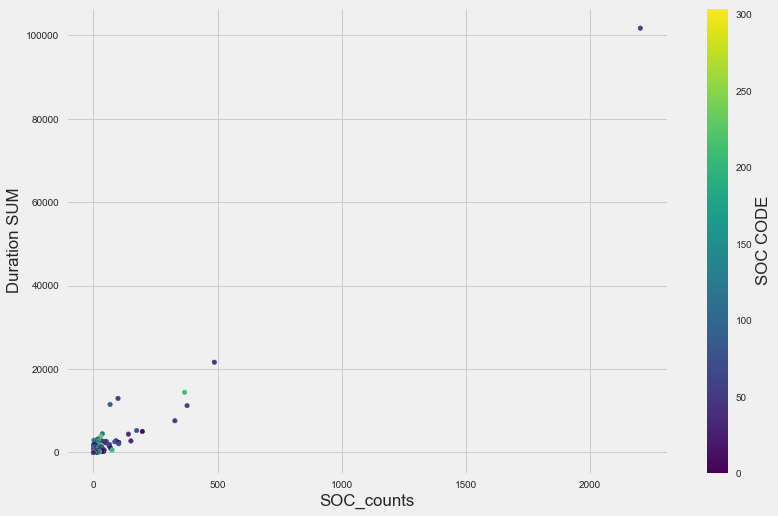

In [120]:
ax1 = corr_df.plot.scatter(x='SOC_counts', y = 'Duration SUM', c='SOC CODE', colormap='viridis')

In [112]:
corr = corr_df.corr(method='pearson')
print(corr)

              SOC CODE  SOC_counts  Duration SUM
SOC CODE      1.000000   -0.098238     -0.084718
SOC_counts   -0.098238    1.000000      0.982424
Duration SUM -0.084718    0.982424      1.000000


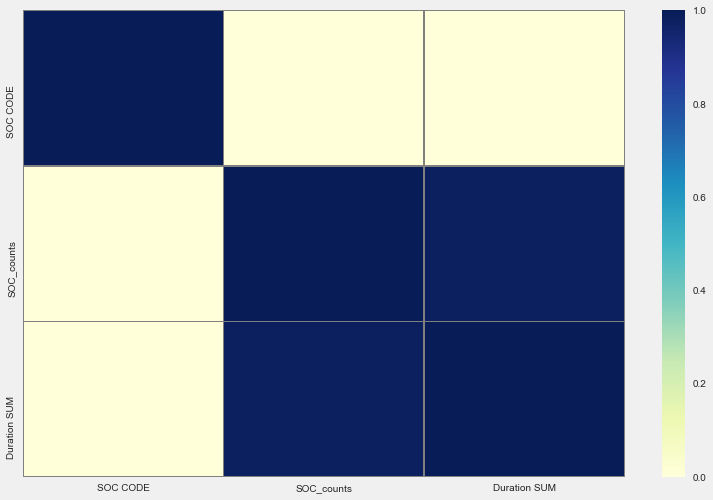

In [113]:
sns.heatmap(corr, vmin=0, vmax=1, linecolor = 'grey', linewidths = .5, cmap="YlGnBu", xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

The resulting correlation on the count job tittles and how long it takes to process them indicates that they have a positive correlation.  It also provides evidence that job category (55) equal to WEB APPL/ENGINEER DEVELOPER is the job that most employeers are trying to fill. Thus, takes the longest processing time. 